In [1]:
import xarray as xr
import numpy as np
from datetime import datetime
from calendar import monthrange
from matplotlib import pyplot as plt, colors
from windrose import WindroseAxes
from cmocean import cm as cmo
from tqdm.notebook import tqdm
from salishsea_tools import wind_tools, places, viz_tools
import pandas as pd


%matplotlib inline

In [2]:
#dfFra=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/Flow/FraserHopeDaily__Feb-8-2021_06_29_29AM.csv',
#                          skiprows=1)
dfFra=pd.read_csv('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/NPGO/FraserRiver_Daily_ECCC.csv',skiprows=1)

In [3]:
dfFra.drop(dfFra.loc[dfFra.PARAM==2].index,inplace=True)

In [4]:
dfFra.rename(columns={'Value':'Flow'}, inplace=True)

In [5]:
dfFra

,ID,PARAM,YEAR,DD,Flow,SYM
0,08MF005,1,1912,61,538.0,NaN
1,08MF005,1,1912,62,538.0,NaN
2,08MF005,1,1912,63,538.0,NaN
3,08MF005,1,1912,64,538.0,NaN
4,08MF005,1,1912,65,538.0,NaN
...,...,...,...,...,...,...
39748,08MF005,1,2020,362,1500.0,NaN
39749,08MF005,1,2020,363,1510.0,NaN
39750,08MF005,1,2020,364,1530.0,NaN
39751,08MF005,1,2020,365,1510.0,NaN


In [6]:
dfFra2=dfFra.loc[(dfFra['YEAR'] >=2007)&(dfFra['YEAR'] <= 2020)]

In [7]:
dfFra2

,ID,PARAM,YEAR,DD,Flow,SYM
34639,08MF005,1,2007,1,689.0,NaN
34640,08MF005,1,2007,2,1040.0,NaN
34641,08MF005,1,2007,3,1180.0,NaN
34642,08MF005,1,2007,4,1020.0,A
34643,08MF005,1,2007,5,917.0,NaN
...,...,...,...,...,...,...
39748,08MF005,1,2020,362,1500.0,NaN
39749,08MF005,1,2020,363,1510.0,NaN
39750,08MF005,1,2020,364,1530.0,NaN
39751,08MF005,1,2020,365,1510.0,NaN


In [8]:
#riv_time=dfFra2['Date'].values
rivFlow=dfFra2['Flow'].values

In [9]:
View2007=dfFra2.loc[dfFra2.YEAR==2007].groupby(['DD']).mean()
View2008=dfFra2.loc[dfFra2.YEAR==2008].groupby(['DD']).mean()
View2009=dfFra2.loc[dfFra2.YEAR==2009].groupby(['DD']).mean()
View2010=dfFra2.loc[dfFra2.YEAR==2010].groupby(['DD']).mean()
View2011=dfFra2.loc[dfFra2.YEAR==2011].groupby(['DD']).mean()
View2012=dfFra2.loc[dfFra2.YEAR==2012].groupby(['DD']).mean()
View2013=dfFra2.loc[dfFra2.YEAR==2013].groupby(['DD']).mean()
View2014=dfFra2.loc[dfFra2.YEAR==2014].groupby(['DD']).mean()
View2015=dfFra2.loc[dfFra2.YEAR==2015].groupby(['DD']).mean()
View2016=dfFra2.loc[dfFra2.YEAR==2016].groupby(['DD']).mean()
View2017=dfFra2.loc[dfFra2.YEAR==2017].groupby(['DD']).mean()
View2018=dfFra2.loc[dfFra2.YEAR==2018].groupby(['DD']).mean()
View2019=dfFra2.loc[dfFra2.YEAR==2019].groupby(['DD']).mean()
View2020=dfFra2.loc[dfFra2.YEAR==2020].groupby(['DD']).mean()

In [10]:
View2020

,PARAM,YEAR,Flow
DD,,,
1,1,2020,1340.0
2,1,2020,1330.0
3,1,2020,1310.0
4,1,2020,1420.0
5,1,2020,1350.0
...,...,...,...
362,1,2020,1500.0
363,1,2020,1510.0
364,1,2020,1530.0


In [11]:
Mean=(View2007+View2008+View2009+View2010+View2011+View2012+View2013+\
      View2014+View2015+View2016+View2017+View2018+View2019+View2020)/14

In [12]:
Mean

,PARAM,YEAR,Flow
DD,,,
1,1.0,2013.5,1009.785714
2,1.0,2013.5,1042.857143
3,1.0,2013.5,1063.142857
4,1.0,2013.5,1079.785714
5,1.0,2013.5,1059.071429
...,...,...,...
362,1.0,2013.5,1094.071429
363,1.0,2013.5,1102.571429
364,1.0,2013.5,1086.214286


Text(0.5, 0, 'Day of Year')

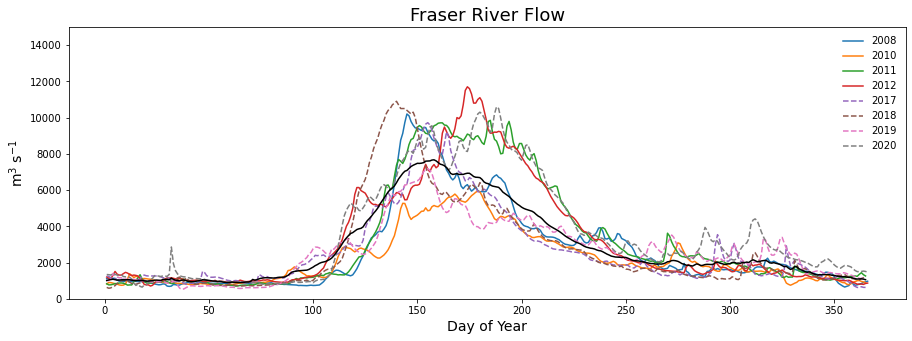

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

#plt.plot(View2007.index,View2007.Flow, linestyle='-',label=2007);
plt.plot(View2008.index,View2008.Flow, linestyle='-',label=2008);
#plt.plot(View2009.index,View2009.Flow, linestyle='-',label=2009);
plt.plot(View2010.index,View2010.Flow, linestyle='-',label=2010);
plt.plot(View2011.index,View2011.Flow, linestyle='-',label=2011);
plt.plot(View2012.index,View2012.Flow, linestyle='-',label=2012);
#plt.plot(View2013.index,View2013.Flow, linestyle='-',label=2013);
#plt.plot(View2014.index,View2014.Flow, linestyle='--',label=2014);
#plt.plot(View2015.index,View2015.Flow, linestyle='--',label=2015);
#plt.plot(View2016.index,View2016.Flow, linestyle='--',label=2016);
plt.plot(View2017.index,View2017.Flow, linestyle='--',label=2017);
plt.plot(View2018.index,View2018.Flow, linestyle='--',label=2018);
plt.plot(View2019.index,View2019.Flow, linestyle='--',label=2019);
plt.plot(View2020.index,View2020.Flow, linestyle='--',label=2020);
plt.plot(Mean.index,Mean.Flow, linestyle='-',color='k');

ax.set_title('Fraser River Flow',fontsize=18)
ax.legend(frameon=False,bbox_to_anchor=(1, 1))
ax.set_ylim(0,15000)
ax.set_ylabel('m$^{3}$ s$^{-1}$',fontsize=14)
ax.set_xlabel('Day of Year',fontsize=14)

In [14]:
Anom2007=View2007-Mean
Anom2008=View2008-Mean
Anom2009=View2009-Mean
Anom2010=View2010-Mean
Anom2011=View2011-Mean
Anom2012=View2012-Mean
Anom2013=View2013-Mean
Anom2014=View2014-Mean
Anom2015=View2015-Mean
Anom2016=View2016-Mean
Anom2017=View2017-Mean
Anom2018=View2018-Mean
Anom2019=View2019-Mean
Anom2020=View2020-Mean

Text(0.5, 0, 'Day of Year')

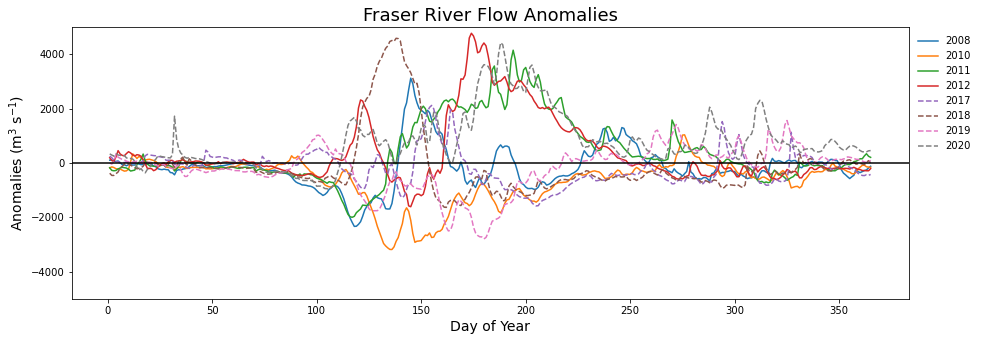

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

#plt.plot(Anom2007.index,Anom2007.Flow, linestyle='-',label=2007);
plt.plot(Anom2008.index,Anom2008.Flow, linestyle='-',label=2008);
#plt.plot(Anom2009.index,Anom2009.Flow, linestyle='-',label=2009);
plt.plot(Anom2010.index,Anom2010.Flow, linestyle='-',label=2010);
plt.plot(Anom2011.index,Anom2011.Flow, linestyle='-',label=2011);
plt.plot(Anom2012.index,Anom2012.Flow, linestyle='-',label=2012);
#plt.plot(Anom2013.index,Anom2013.Flow, linestyle='-',label=2013);
#plt.plot(Anom2014.index,Anom2014.Flow, linestyle='--',label=2014);
#plt.plot(Anom2015.index,Anom2015.Flow, linestyle='--',label=2015);
#plt.plot(Anom2016.index,Anom2016.Flow, linestyle='--',label=2016);
plt.plot(Anom2017.index,Anom2017.Flow, linestyle='--',label=2017);
plt.plot(Anom2018.index,Anom2018.Flow, linestyle='--',label=2018);
plt.plot(Anom2019.index,Anom2019.Flow, linestyle='--',label=2019);
plt.plot(Anom2020.index,Anom2020.Flow, linestyle='--',label=2020);
plt.axhline(y=0, linestyle='-',color='k');

ax.set_title('Fraser River Flow Anomalies',fontsize=18)
ax.legend(frameon=False,bbox_to_anchor=(1, 1))
ax.set_ylim(-5000,5000)
ax.set_ylabel('Anomalies (m$^{3}$ s$^{-1}$)',fontsize=14)
ax.set_xlabel('Day of Year',fontsize=14)